In [21]:
import pandas as pd
LossDF = pd.read_csv('finalLabRes_AimColumn_all_loss.csv')
ModelName = "Qwen"  
DatasetName = "Criminal"
AimColumn = "f1"
CriminalDF = LossDF[(LossDF['llmName']==ModelName)&(LossDF['dataset']==DatasetName)]
epsList = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
epsResultF1 = {}
epsResultP = {}
epsResultR = {}
for eps in epsList:
    epsResultF1[eps] = list(CriminalDF[CriminalDF['eps'] == eps]['f1'])
    epsResultP[eps] = list(CriminalDF[CriminalDF['eps'] == eps]['precision'])
    epsResultR[eps] = list(CriminalDF[CriminalDF['eps'] == eps]['recall'])
epsResultF1DF = pd.DataFrame(epsResultF1)
epsResultPDF = pd.DataFrame(epsResultP)
epsResultRDF = pd.DataFrame(epsResultR)

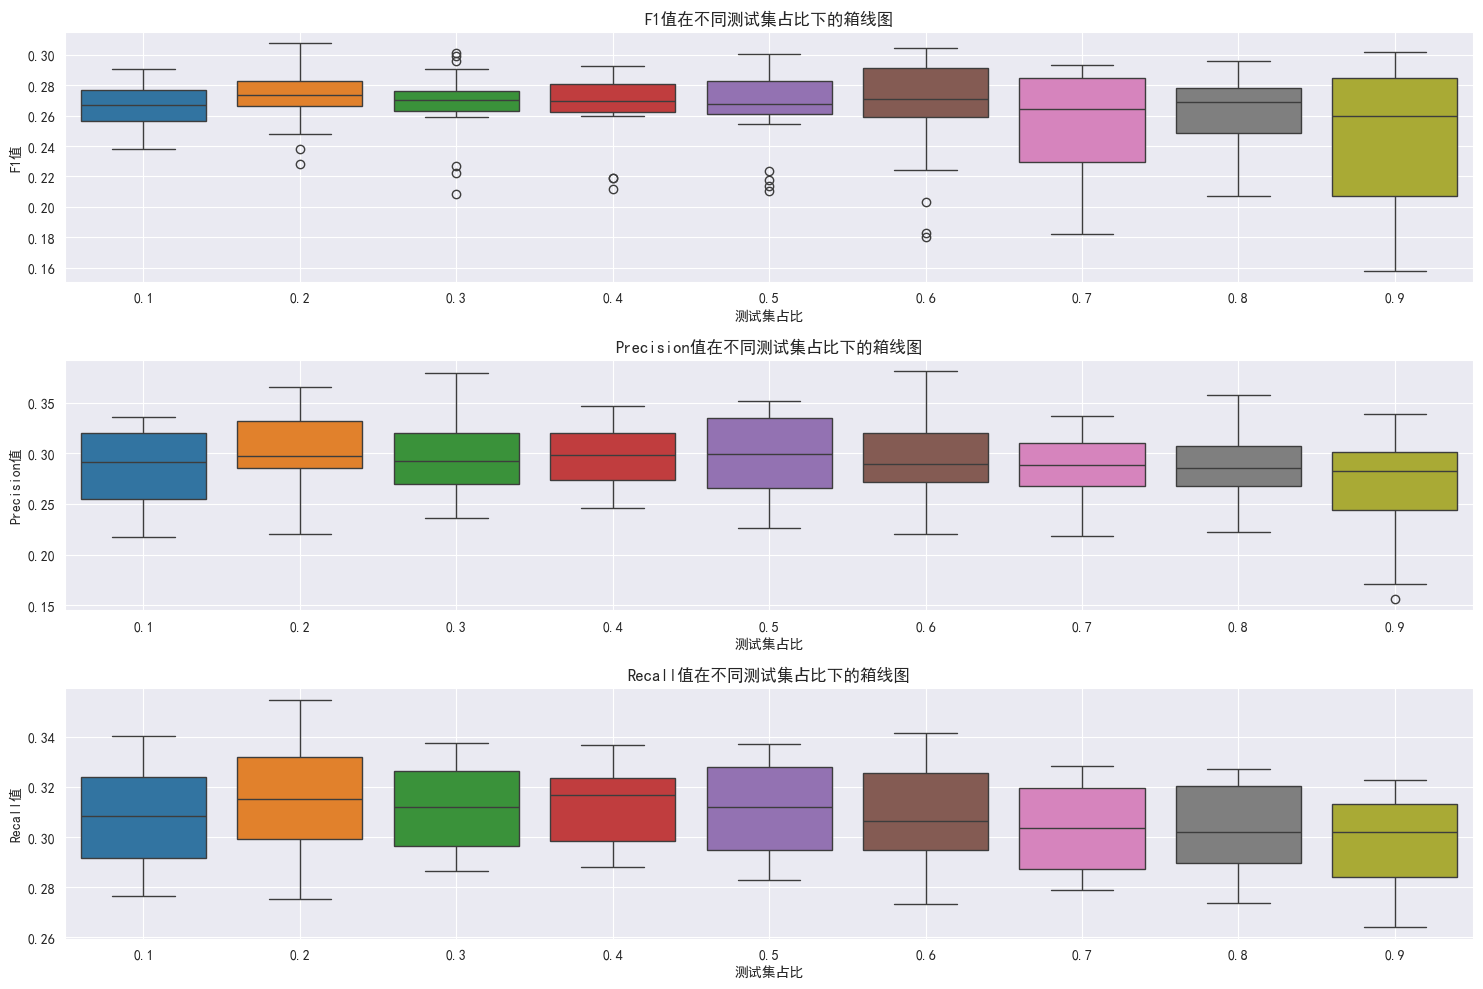

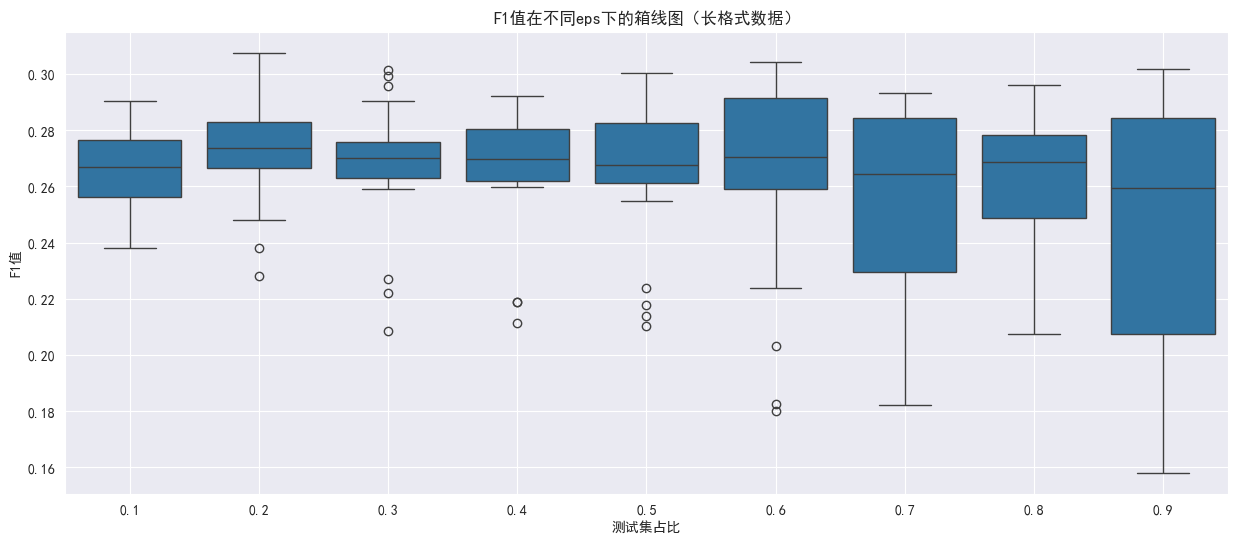

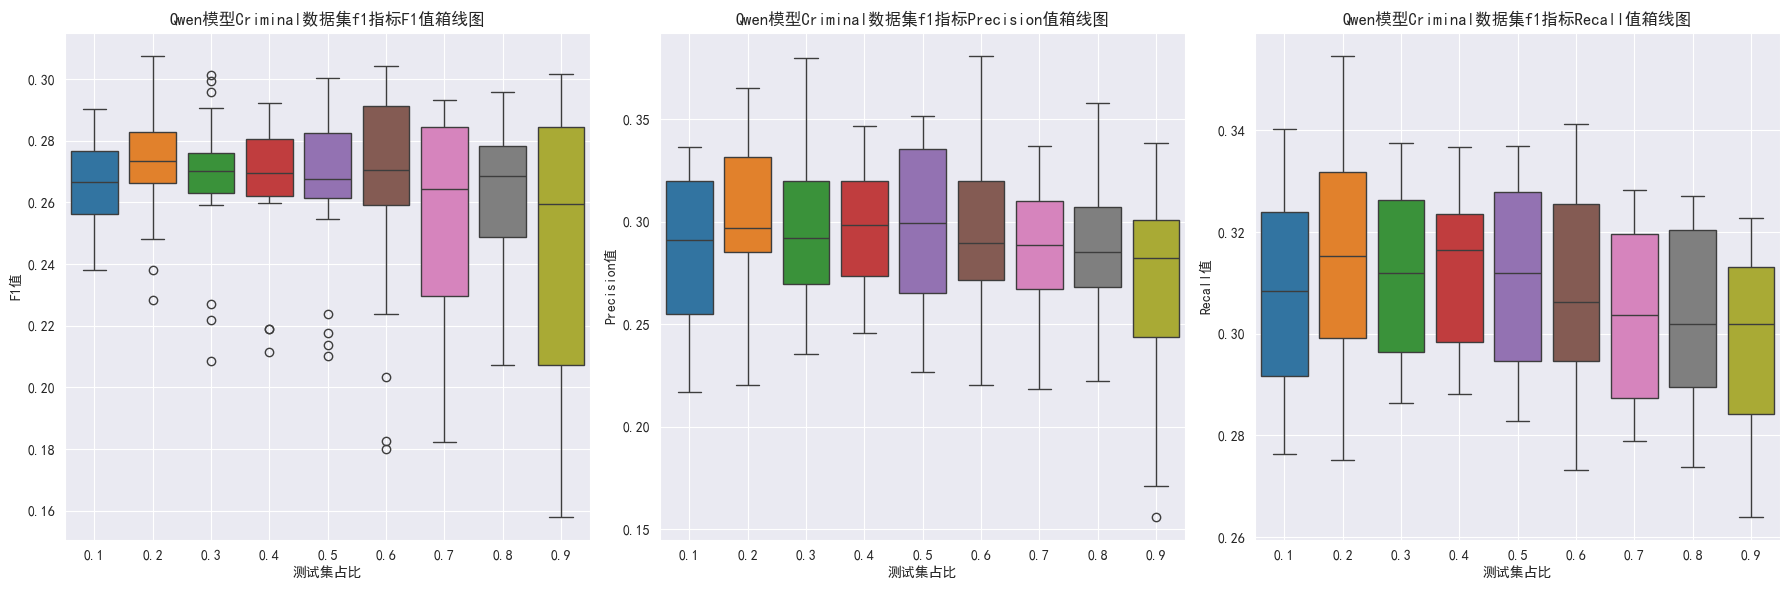

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 配置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置图形大小
plt.figure(figsize=(15, 10))

# 为F1值创建箱线图
plt.subplot(3, 1, 1)
sns.boxplot(data=epsResultF1DF)
plt.title('F1值在不同测试集占比下的箱线图')
plt.xlabel('测试集占比')
plt.ylabel('F1值')
plt.grid(True)

# 为Precision值创建箱线图
plt.subplot(3, 1, 2)
sns.boxplot(data=epsResultPDF)
plt.title('Precision值在不同测试集占比下的箱线图')
plt.xlabel('测试集占比')
plt.ylabel('Precision值')
plt.grid(True)

# 为Recall值创建箱线图
plt.subplot(3, 1, 3)
sns.boxplot(data=epsResultRDF)
plt.title('Recall值在不同测试集占比下的箱线图')
plt.xlabel('测试集占比')
plt.ylabel('Recall值')
plt.grid(True)

plt.tight_layout()
plt.show()

# 也可以使用seaborn的melt函数将数据转换为长格式，创建更美观的图表
plt.figure(figsize=(15, 6))

# 将F1数据转换为长格式
f1_melted = pd.melt(epsResultF1DF.reset_index(), id_vars=['index'],
                   value_vars=epsList,
                   var_name='eps', value_name='F1')

# 创建箱线图
sns.boxplot(x='eps', y='F1', data=f1_melted)
plt.title('F1值在不同eps下的箱线图（长格式数据）')
plt.xlabel('测试集占比')
plt.ylabel('F1值')
plt.grid(True)
plt.show()

# 创建三个指标的并排箱线图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# F1箱线图
sns.boxplot(data=epsResultF1DF, ax=axes[0])
axes[0].set_title(f'{ModelName}模型{DatasetName}数据集{AimColumn}指标F1值箱线图')
axes[0].set_xlabel('测试集占比')
axes[0].set_ylabel('F1值')
axes[0].grid(True)

# Precision箱线图
sns.boxplot(data=epsResultPDF, ax=axes[1])
axes[1].set_title(f'{ModelName}模型{DatasetName}数据集{AimColumn}指标Precision值箱线图')
axes[1].set_xlabel('测试集占比')
axes[1].set_ylabel('Precision值')
axes[1].grid(True)

# Recall箱线图
sns.boxplot(data=epsResultRDF, ax=axes[2])
axes[2].set_title(f'{ModelName}模型{DatasetName}数据集{AimColumn}指标Recall值箱线图')
axes[2].set_xlabel('测试集占比')
axes[2].set_ylabel('Recall值')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
LossDF = pd.read_csv('finalLabRes_AimColumn_all_loss.csv')
CriminalQwenDF = LossDF[(LossDF['llmName']=="Qwen")&(LossDF['dataset']=="Criminal")]
epsList = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
epsResultF1 = {}
epsResultP = {}
epsResultR = {}
for eps in epsList:
    epsResultF1[eps] = list(CriminalQwenDF[CriminalQwenDF['eps'] == eps]['f1'])
    epsResultP[eps] = list(CriminalQwenDF[CriminalQwenDF['eps'] == eps]['precision'])
    epsResultR[eps] = list(CriminalQwenDF[CriminalQwenDF['eps'] == eps]['recall'])
epsResultF1DF = pd.DataFrame(epsResultF1)
epsResultPDF = pd.DataFrame(epsResultP)
epsResultRDF = pd.DataFrame(epsResultR)